Calibrating Camera Images.*

Undistorted image is:
dist: 
[[-0.22273324  0.19745897  0.02285857  0.00068239 -0.09365344]]


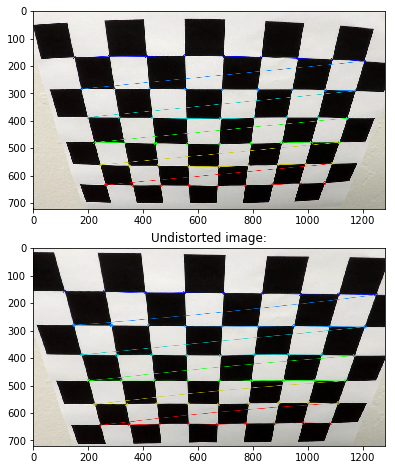

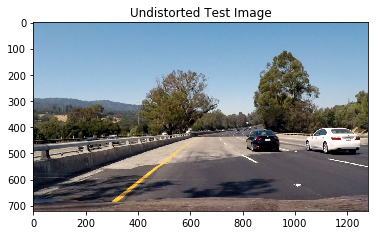

In [13]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

%matplotlib inline


#plt.imshow(img)
img = mpimg.imread('.//camera_cal/calibration2.jpg')
#plt.imshow(img)

objpoints = []
imgpoints = []
objp = np.zeros((6*9,3), dtype=np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
if ret==True:
    objpoints.append(objp)
    imgpoints.append(corners)
    img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    print("Undistorted image is:")
    plt.figure(1,figsize = (16,8))
    plt.subplot(211)
    plt.imshow(img)
    plt.subplot(212)
    plt.imshow(dst)
    plt.title("Undistorted image:")
    print("dist: ")
    print(dist)
    
else:
    print("Images not found!!")
plt.figure(2)
test_img = mpimg.imread(".//test_images//test4.jpg")
cv2.undistort(test_img, mtx, dist, None, mtx)
plt.title("Undistorted Test Image")

#fig = plt.figure(figsize = (6,6))
#plt.plot((200,200),marker = 'o', color = 'r')
plt.imshow(test_img)



    



(720, 1280)


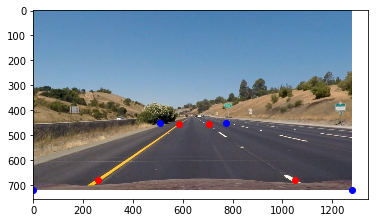

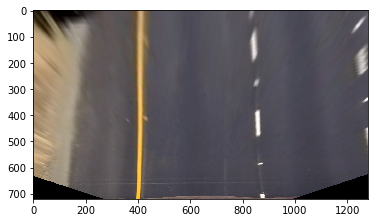

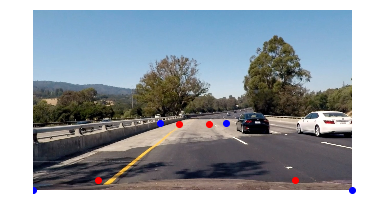

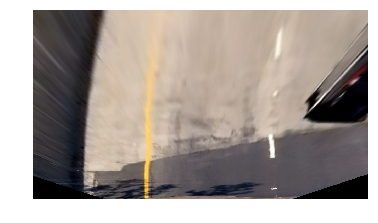

In [14]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2




%matplotlib inline
img_size = gray.shape
print(img_size)
test_img = mpimg.imread(".//test_images//straight_lines1.jpg")
und_test_img = cv2.undistort(test_img, mtx, dist, None, mtx)
plt.figure(1)
plt.imshow(und_test_img)

src = np.float32(
        [[585,455],
         [705,455],
         [1050,680],
         [260,680]])

dest = np.float32(
        [[400,0],
         [880,0],
         [880,710],
         [400,710]])
plt.plot([585,705,1050,260],[455,455,680,680],'ro')
plt.plot([510,775,0,1280],[450,450,720,720],'bo')

#Red points are for warping the image
#Blue points are for Region Of Intrest

M = cv2.getPerspectiveTransform(src,dest)
Minv = cv2.getPerspectiveTransform(dest, src)

st_warped = cv2.warpPerspective(und_test_img, M, (1280,720), flags=cv2.INTER_LINEAR)
plt.figure(2)
plt.imshow(st_warped)

warped_img = mpimg.imread(".//test_images//test4.jpg")
warped_img_und = cv2.undistort(warped_img, mtx, dist, None, mtx)
#warped_img_und = ROI(warped_img_und, [vertices])
warped_img = cv2.warpPerspective(warped_img_und, M, (1280,720), flags=cv2.INTER_LINEAR)
plt.figure(3)
plt.imshow(warped_img_und)
plt.axis('off')
plt.plot([585,705,1050,260],[455,455,680,680],'ro')
plt.plot([510,775,0,1280],[450,450,720,720],'bo')




plt.figure(4)
plt.imshow(warped_img)
plt.axis('off')

gray = cv2.cvtColor(warped_img_und, cv2.COLOR_RGB2GRAY)





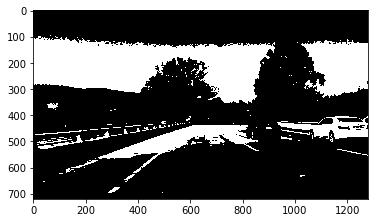

In [15]:
gray_binary = np.zeros_like(gray)
gray_thresh = (170,255)
gray_binary[(gray>=gray_thresh[0]) & (gray<=gray_thresh[1])] = 1
plt.imshow(gray_binary, cmap='gray')

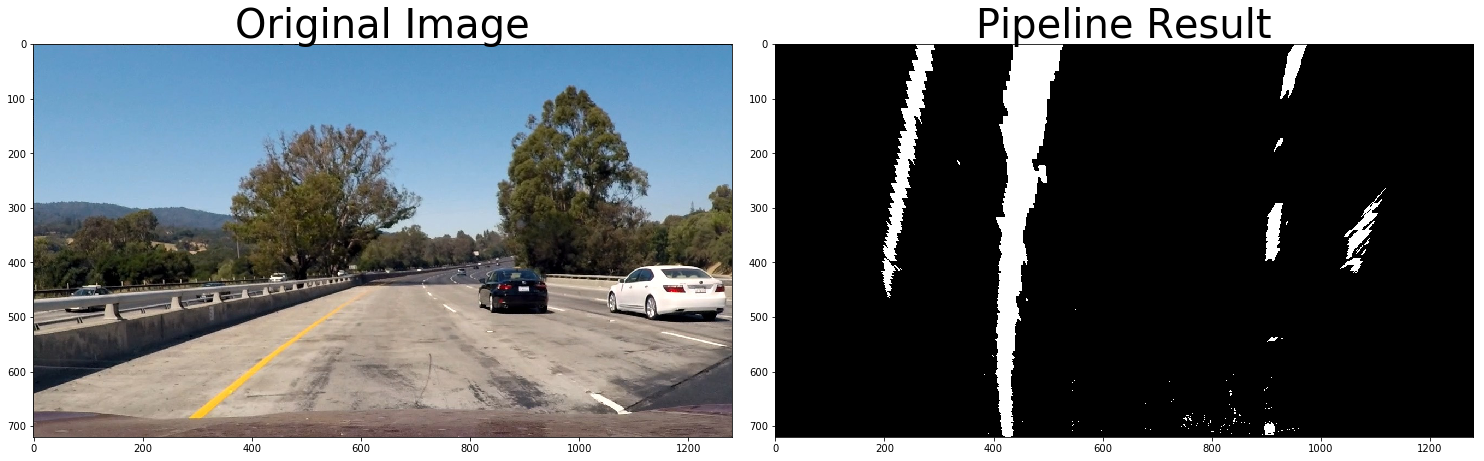

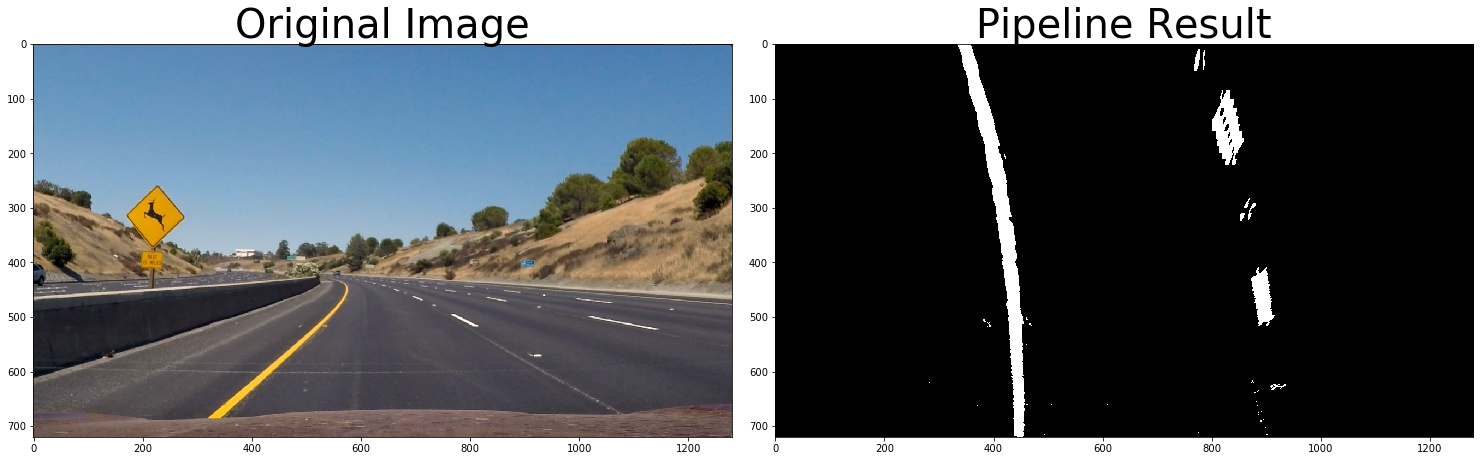

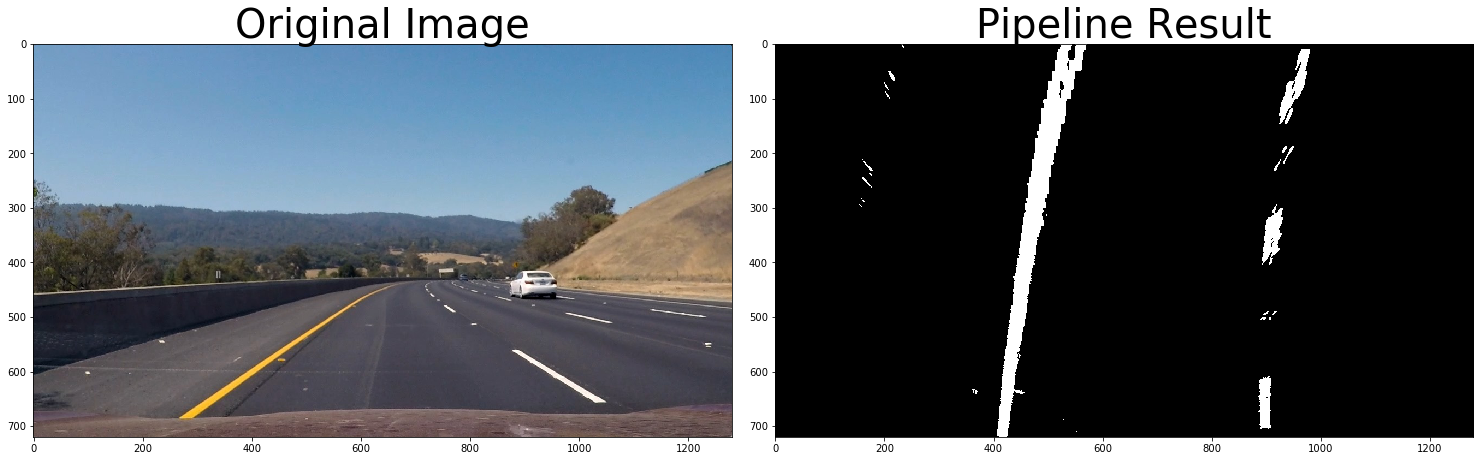

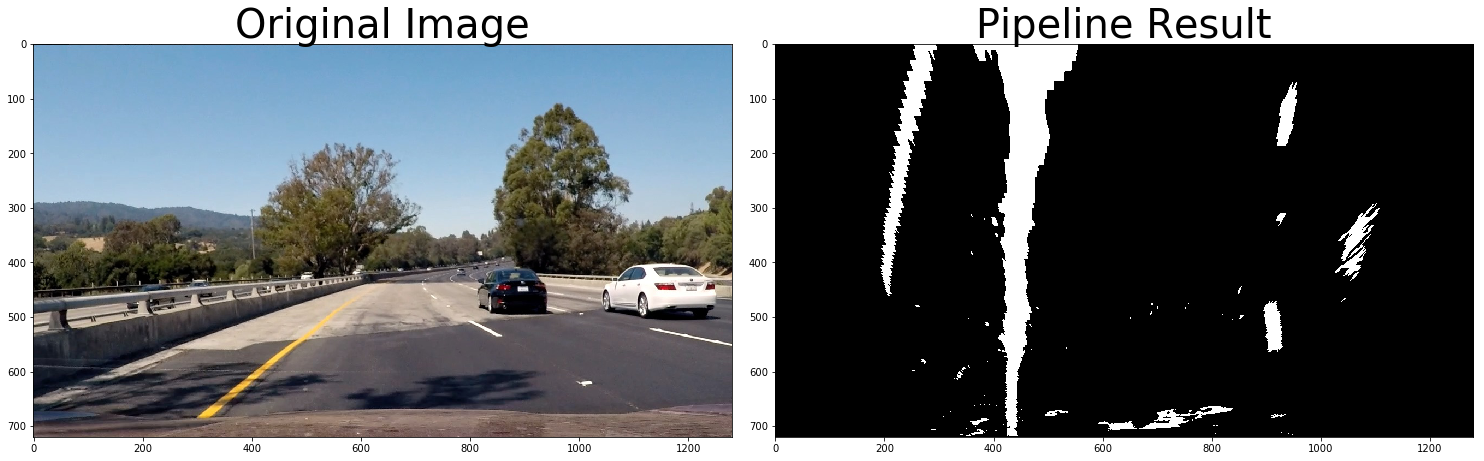

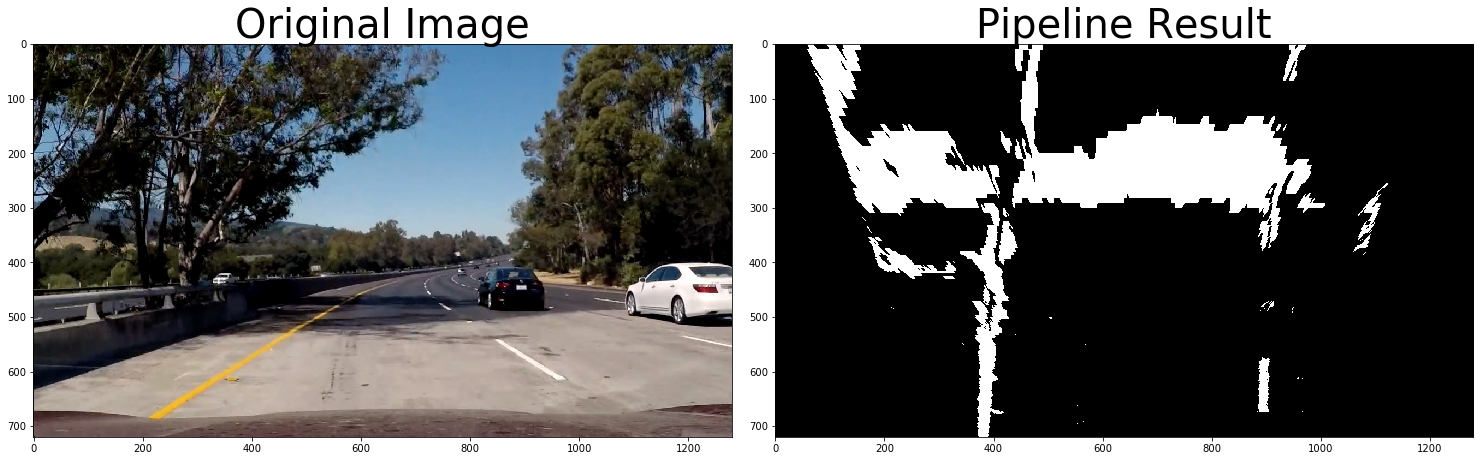

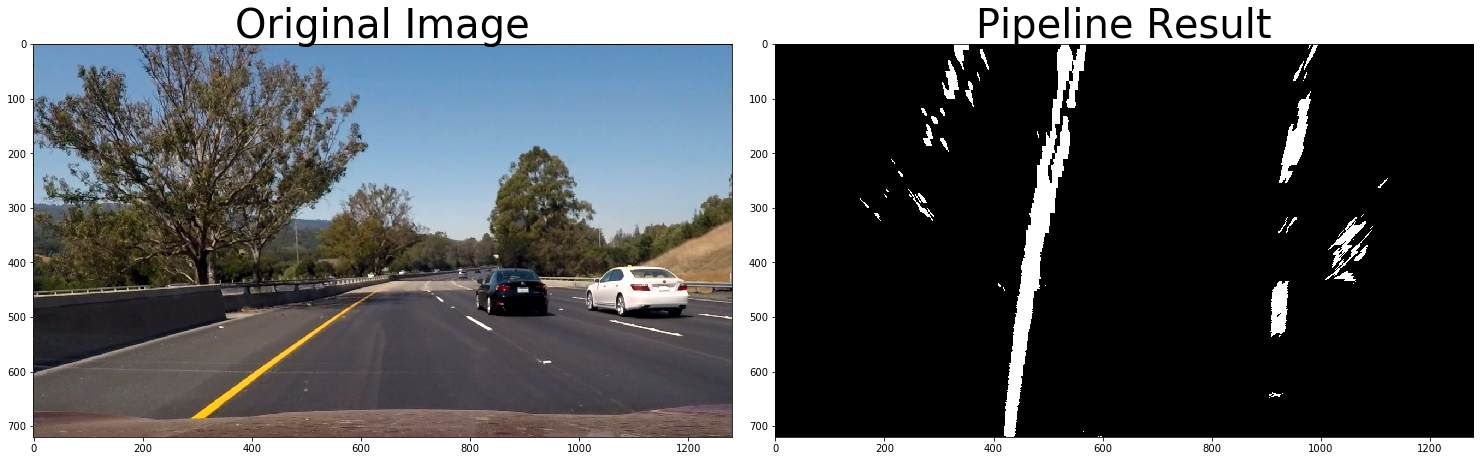

In [16]:

def sobel_x_thresh(image, sx_thresh = (20,80), kernel_size = 3):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(image, cv2.CV_64F,1,0, ksize = kernel_size)
    sobely = cv2.Sobel(image, cv2.CV_64F,0,1, ksize = kernel_size)
    abs_sobel_x = np.absolute(sobelx)
    scaled_sobel = np.uint8(abs_sobel_x*(255/np.max(abs_sobel_x)))   
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel>=sx_thresh[0]) & (scaled_sobel<=sx_thresh[1])] = 1
    return(sxbinary)


def sobel_y_thresh(image, sy_thresh = (20,80), kernel_size = 3):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(image, cv2.CV_64F,1,0, ksize = kernel_size)
    sobely = cv2.Sobel(image, cv2.CV_64F,0,1, ksize = kernel_size)
    abs_sobel_y = np.absolute(sobely)
    scaled_sobel = np.uint8(abs_sobel_y*(255/np.max(abs_sobel_y)))   
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel>=sy_thresh[0]) & (scaled_sobel<=sy_thresh[1])] = 1
    return(sxbinary)


def mag_thresh(img, mag_thresh=(50, 120), sobel_kernel=3):
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    sobely = cv2.Sobel(gray,cv2.CV_64F, 0 , 1)
    gradmag = np.sqrt(sobelx**2+sobely**2)
    scale_factor = 255/np.max(gradmag)
    gradmag = (gradmag*scale_factor).astype(np.uint8)
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag>=mag_thresh[0]) & (gradmag<=mag_thresh[1])] = 1
    
    return(binary_output)


def dir_threshold(img, dir_thresh=(0.7, 1.3), sobel_kernel=3):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    dirmag = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    #binary_2 = np.zeros_like(dirmag)
    
    scale_factor = 255/np.max(dirmag)
    scaled_dirmag = (dirmag).astype(np.uint8)
    binary_output = np.zeros_like(dirmag)
    binary_output[(dirmag>=dir_thresh[0]) & (dirmag<=dir_thresh[1])] = 1

    return binary_output

def R_thresh(img, Rthresh = (200, 255)):
    R = img[:,:,0]    
    Rbinary = np.zeros_like(R)
    Rbinary[(R > Rthresh[0]) & (R <= Rthresh[1])] = 1
    return(Rbinary)
    
def S_thresh(img, Sthresh = (90, 255)):   
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    S = hls[:,:,2]
    Sbinary = np.zeros_like(S)
    Sbinary[(S > Sthresh[0]) & (S <= Sthresh[1])] = 1
    return(Sbinary)

def ROI(img, vertices):
    mask = np.zeros_like(img)
    if len(img.shape)>2:
        ignore_mask_color = (255,)*3
    else:
        ignore_mask_color = (255)
        
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image




# gradmag = np.sqrt(sobelx**2, sobely**2)
# magthresh = (50,120)
# scale_factor = 255/np.max(gradmag)
# gradmag = (gradmag*scale_factor).astype(np.uint8)
# mag_binary = np.zeros_like(gradmag)
# mag_binary[(gradmag>=magthresh[0]) & (gradmag<=magthresh[1])] = 1
# 
# 
# mag_sx_comb = np.zeros_like(gradmag)
# mag_sx_comb[(mag_binary==1)| (sxbinary==1)] = 1

vertices = np.array([[510,450],[775,450],[1280,720],[0,720]], np.int32)


test = mpimg.imread(".//test_images//test1.jpg")

def pipeline(img):
    undistorted = cv2.undistort(img, mtx, dist, None, mtx)
    gradx = sobel_x_thresh(undistorted, sx_thresh = (20,255), kernel_size = 3)
    grady = sobel_y_thresh(undistorted, sy_thresh = (60,255), kernel_size = 3)
    mag_binary = mag_thresh(undistorted, mag_thresh=(40, 255), sobel_kernel=3)
    dir_binary = dir_threshold(undistorted, dir_thresh=(0.7, 1.2), sobel_kernel=3)
    comb_x_mag = np.zeros_like(dir_binary)
    comb_x_mag[((gradx == 1)&(grady==1)) | ((mag_binary == 1)&(dir_binary==1))] = 1
    S_img = S_thresh(undistorted, (90, 255))
    comb_S = np.zeros_like(S_img)
    comb_S[(S_img==1)|(comb_x_mag==1)]=1
    comb_S = ROI(comb_S, [vertices])
    final = cv2.warpPerspective(comb_S, M, (1280,720), flags=cv2.INTER_LINEAR)

    return(final)



for i in range(1,7):
    fname = './/test_images/test{}.jpg'.format(i)
    image = mpimg.imread(fname)
    result = pipeline(image)

    # Plot the result
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    f.tight_layout()

    ax1.imshow(image)
    ax1.set_title('Original Image', fontsize=40)

    ax2.imshow(result, cmap='gray')
    ax2.set_title('Pipeline Result', fontsize=40)
   
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

421 909


(720, 0)

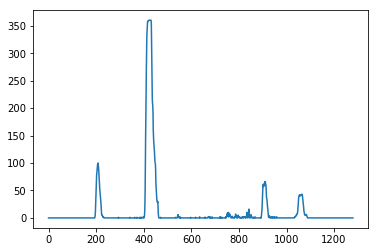

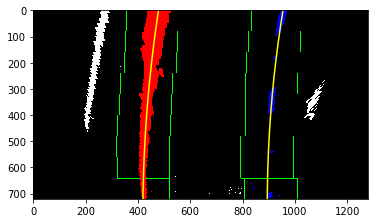

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


fname = './/test_images/test{}.jpg'.format(1)
image = mpimg.imread(fname)
binary_warped = pipeline(image)
histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
midpoint = np.int(histogram.shape[0]//2)
leftx_base = np.argmax(histogram[0:midpoint])
rightx_base = np.argmax(histogram[midpoint:]) + midpoint

print(leftx_base, rightx_base)
plt.figure(1)
plt.plot(histogram)


# Choose the number of sliding windows
nwindows = 9
# Set height of windows
window_height = np.int(binary_warped.shape[0]/nwindows)
# Identify the x and y positions of all nonzero pixels in the image
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
# Current positions to be updated for each window
leftx_current = leftx_base
rightx_current = rightx_base
# Set the width of the windows +/- margin
margin = 100
# Set minimum number of pixels found to recenter window
minpix = 50
# Create empty lists to receive left and right lane pixel indices
left_lane_inds = []
right_lane_inds = []

# Step through the windows one by one
for window in range(nwindows):
    # Identify window boundaries in x and y (and right and left)
    win_y_low = binary_warped.shape[0] - (window+1)*window_height
    win_y_high = binary_warped.shape[0] - window*window_height
    win_xleft_low = leftx_current - margin
    win_xleft_high = leftx_current + margin
    win_xright_low = rightx_current - margin
    win_xright_high = rightx_current + margin
    # Draw the windows on the visualization image
    cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
    cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
    # Identify the nonzero pixels in x and y within the window
    good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
    good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
    # Append these indices to the lists
    left_lane_inds.append(good_left_inds)
    right_lane_inds.append(good_right_inds)
    # If you found > minpix pixels, recenter next window on their mean position
    if len(good_left_inds) > minpix:
        leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
    if len(good_right_inds) > minpix:        
        rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

# Concatenate the arrays of indices
left_lane_inds = np.concatenate(left_lane_inds)
right_lane_inds = np.concatenate(right_lane_inds)

# Extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds] 

# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)


# Generate x and y values for plotting
plt.figure(2)
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)





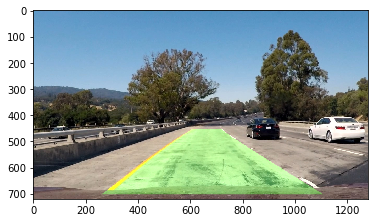

In [18]:
# Create an image to draw the lines on
warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

# Recast the x and y points into usable format for cv2.fillPoly()
pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

# Warp the blank back to original image space using inverse perspective matrix (Minv)
newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
# Combine the result with the original image
result = cv2.addWeighted(image, 1, newwarp, 0.3, 0)
plt.imshow(result)

In [19]:
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = [np.array([False])]  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None
        #values of lane difference of last n fits of lines
        self.lane_difference = None
        #value of centre offset
        self.centre_offset = None

In [20]:

#This function will be used to both checck the sanity of the lines that have been found as well as to write the values 
#of the radius of curvature and the offset from centre
def get_lane_values(left_fitx, right_fitx):
    #find the centre point of lane(in pixels) and the radius of curvature 
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    ym_per_pix = 30/720 # meters per pixel in y dimension
    mean_distance = np.mean(right_fitx - left_fitx)
    mean_distance = mean_distance*xm_per_pix
    mean_point = left_fitx[-1] + mean_distance//2
    centre_point = 1280/2
    centre_offset = centre_point - mean_point
    centre_offset = centre_offset*xm_per_pix
     
    ploty = np.linspace(0, 719, num=720)
    y_eval = np.max(ploty)
    # Define conversions in x and y from pixels space to meters

    
    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(ploty*ym_per_pix, left_fitx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, right_fitx*xm_per_pix, 2)
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    curverad = (left_curverad + right_curverad)/2
    # Now our radius of curvature is in meters
    
    return mean_distance, centre_offset, left_curverad, right_curverad

#if last values are present it will return those values or else it will return how many ever items present
def last_items(array, no_items):
#     if len(array)==0:
#         return(None)
    if no_items>len(array):
        return(array[::-1])
    else:
        return(array[:len(array)-no_items-1:-1])
    
    
    
    
    

def Check_Sanity(left_fitx, right_fitx):
    
    global no_of_bad_lines
    if((left_fitx==None) or (right_fitx==None)):
        return(False)
    
    mean_distance, centre_offset, left_curverad, right_curverad = get_lane_values(left_fitx, right_fitx)
    mean_dist_avg = Right.lane_difference
    avg_ROC = np.mean(Right.radius_of_curvature + Left.radius_of_curvature)
    curverad_of_line = np.mean(left_curverad + right_curverad)
    
    
    if (mean_distance < 0.7*mean_dist_avg or 
        mean_distance > 1.3*mean_dist_avg):
        #no_of_bad_lines+=1
        return (False)
     
    elif (curverad_of_line < 0.8*avg_ROC or
             curverad_of_line > 1.2*avg_ROC):        
        #no_of_bad_lines+=1
        return (False)
    
    else:
        #no_of_bad_lines = 0
        return(True)
    
    
def brute_search(warped_img, show=0):
    histogram = np.sum(warped_img[warped_img.shape[0]//2:,:], axis=0)
    out_img = np.dstack((warped_img, warped_img, warped_img))*255
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[0:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint
    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(warped_img.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = warped_img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = warped_img.shape[0] - (window+1)*window_height
        win_y_high = warped_img.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)
    
    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 
    
    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    

    # Generate x and y values for plotting
    ploty = np.linspace(0, warped_img.shape[0]-1, warped_img.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    if show==1:
        
        plt.figure(1)
        plt.plot(histogram)
        
        out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
        out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
        plt.figure(2)
        plt.imshow(out_img)
        plt.plot(left_fitx, ploty, color='yellow')
        plt.plot(right_fitx, ploty, color='yellow')
        plt.xlim(0, 1280)
        plt.ylim(720, 0)
        
        
    return(left_fitx, right_fitx)


def sliding_window_search(binary_warped, left_fit, right_fit):
    # Assume you now have a new warped binary image 
    # from the next frame of video (also called "binary_warped")
    # It's now much easier to find line pixels!
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 50
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin)) & 
                    (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin))).nonzero()[0] 
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) & 
                    (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin))).nonzero()[0]
    
    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    
    if((len(leftx)==0) | (len(lefty)==0) | (len(rightx)==0) | (len(righty)==0)):
        return(None, None)

    else:
        # Fit a second order polynomial to each
        left_fit = np.polyfit(lefty, leftx, 2)
        right_fit = np.polyfit(righty, rightx, 2)
        # Generate x and y values for plotting
        ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
        return(left_fitx, right_fitx)
    
#     if show==1:
#         # Create an image to draw on and an image to show the selection window
#         out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
#         window_img = np.zeros_like(out_img)
#         # Color in left and right line pixels
#         out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
#         out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
#         
#         # Generate a polygon to illustrate the search window area
#         # And recast the x and y points into usable format for cv2.fillPoly()
#         left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
#         left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
#         left_line_pts = np.hstack((left_line_window1, left_line_window2))
#         right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
#         right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
#         right_line_pts = np.hstack((right_line_window1, right_line_window2))
#         
#         # Draw the lane onto the warped blank image
#         cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
#         cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
#         result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
#         plt.imshow(result)
#         plt.plot(left_fitx, ploty, color='yellow')
#         plt.plot(right_fitx, ploty, color='yellow')
#         plt.xlim(0, 1280)
#         plt.ylim(720, 0)
        
        


def DrawPoly(left_fitx, right_fitx, centre_offset, curverad, img):
    # Create an image to draw the lines on
    
    gray = cv2.cvtColor(warped_img_und, cv2.COLOR_RGB2GRAY)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    warp_zero = np.zeros_like(gray).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    ploty = np.linspace(0, gray.shape[0]-1, gray.shape[0] )
    
    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))
    
    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, [np.int_(pts)], (0,255, 0))
    
    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)
    if centre_offset > 0:
        cv2.putText(result, 'Vehicle is {:.2f}m right of center'.format(abs(centre_offset)), (100,80),
                     fontFace = 16, fontScale = 2, color=(255,255,255), thickness = 2)
    else:
        cv2.putText(result, 'Vehicle is {:.2f}m left of center'.format(abs(centre_offset)), (100,80),
                 cv2.FONT_HERSHEY_SIMPLEX, fontScale = 1.5, color=(255,255,255), thickness = 3)
    cv2.putText(result, 'Radius of Curvature: {}(m)'.format(curverad), (120,140),cv2.FONT_HERSHEY_SIMPLEX
                , fontScale = 1.5, color=(255,255,255), thickness = 3)
    return(result)
            
        
        
# test = './/test_images/test{}.jpg'.format(1)
# image = mpimg.imread(test)
# binary = pipeline(image)
# left_fitx, right_fitx = brute_search(binary, show=0)  
# # mean_distance, centre_offset, left_curverad, right_curverad = get_lane_values(left_fitx, right_fitx)
# # print(mean_distance, mean_point, curverad)
# DrawPoly(left_fitx, right_fitx, image)
        
        

In [21]:
# Left = Line()
# Right = Line()

def final_pipeline(img):
    global no_of_bad_lines
    no_of_bad_lines = 6
    binary_warped = pipeline(img)
    num_rows = len(binary_warped)
    #start with a brute search, and every time no_of_bad_lines > 5 do a brute search again
    if no_of_bad_lines>5:
        left_fitx, right_fitx = brute_search(binary_warped, show = 0)
        if ((len(left_fitx)==0) | (len(right_fitx)==0)):
            return(img)
        ploty = np.linspace(0, num_rows-1, num_rows)
        left_fit = np.polyfit(ploty, left_fitx, 2)
        right_fit = np.polyfit(ploty, right_fitx, 2)
        mean_distance, centre_offset, left_curverad, right_curverad = get_lane_values(left_fitx, right_fitx)
        
        #when a new brute search happens lane_difference values and ROC are given new values
        Right.lane_difference = mean_distance
        Right.centre_offset = centre_offset
        Right.radius_of_curvature = right_curverad
        Left.radius_of_curvature = left_curverad
        #The best_fit are also given new numpy arrays that only contain the currently found fit polynomials
        Left.best_fit = np.array([left_fit])
        Right.best_fit = np.array([right_fit])
        no_of_bad_lines = 0
        curverad = np.mean(Right.radius_of_curvature + Left.radius_of_curvature)
        result = DrawPoly(left_fitx, right_fitx, centre_offset, curverad, img)
        return(result)
        
        
    else:
        sliding_average_lines = 4
        left_fit = np.mean(last_items(Left.best_fit, sliding_average_lines), axis = 0)
        right_fit = np.mean(last_items(Right.best_fit, sliding_average_lines), axis = 0)
        #import ipdb; ipdb.set_trace()
        left_fitx, right_fitx = sliding_window_search(binary_warped, left_fit, right_fit)
        if ((left_fitx!=None) and (right_fitx!=None)):
            ploty = np.linspace(0, num_rows-1, num_rows)
            left_fit = np.polyfit(ploty, left_fitx, 2)
            right_fit = np.polyfit(ploty, right_fitx, 2)
        
        #if a new found line does not pass the sanity check then the no of bad lines are increased, and no changes are
        #made to the Line.best_fit arrays. And the lane polynomials are drawn on the image using the previous 5 best_fit
        #lines.
        if (Check_Sanity(left_fitx, right_fitx)==False):
            no_of_bad_lines+=1
            #if new found line does not qualify sanity checks, then draw the on the img using average of previous
            #drawpoly_lines number of lines
            ploty = np.linspace(0, num_rows-1, num_rows)
            poor_drawpoly_lines = 5
            left_fit = np.mean(last_items(Left.best_fit, poor_drawpoly_lines), axis = 0)
            right_fit = np.mean(last_items(Right.best_fit, poor_drawpoly_lines), axis = 0)

            left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
            right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2] 
#             #Deugging
#             print(left_fit)
#             plt.figure()
#             plt.plot(left_fitx, ploty, color='yellow')
#             plt.plot(right_fitx, ploty, color='yellow')
            
            #drawpoly using past 5 best fit lines
            curverad = np.mean(Right.radius_of_curvature + Left.radius_of_curvature)
            result = DrawPoly(left_fitx, right_fitx, Right.centre_offset, curverad, img)
            return(result)
            
        #if however the new found lines are valid then the best_fit arrays, ROC values and mean_difference values are
        #updated, and the lane polynomial is drawn using the last 3 best_fit lines which includes the new found line.
        else:
            good_drawpoly_lines = 3
            Left.best_fit = np.concatenate((Left.best_fit, np.array([left_fit])), axis=0)
            Right.best_fit = np.concatenate((Right.best_fit, np.array([right_fit])), axis=0)
            left_fit = np.mean(last_items(Left.best_fit, good_drawpoly_lines), axis = 0)
            right_fit = np.mean(last_items(Right.best_fit, good_drawpoly_lines), axis = 0)
            left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
            right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
            
            mean_distance, centre_offset, left_curverad, right_curverad = get_lane_values(left_fitx, right_fitx)
            Right.lane_difference = 0.7*Right.lane_difference + 0.3*mean_distance
            Right.radius_of_curvature = 0.7*Right.radius_of_curvature + 0.3*right_curverad
            Left.radius_of_curvature = 0.7*Left.radius_of_curvature + 0.3*left_curverad
            curverad = np.mean(Right.radius_of_curvature + Left.radius_of_curvature)
            result = DrawPoly(left_fitx, right_fitx, centre_offset, curverad, img)
#             #Deugging
#             plt.figure()
#             plt.plot(left_fitx, ploty, color='yellow')
#             plt.plot(right_fitx, ploty, color='yellow')
            
            
            no_of_bad_lines = 0
            return(result)
        
        
        

            
            
            
            
            
        
        
    

    

In [22]:

# Left = Line()
# Right = Line()
# fname = './/test_images/test{}.jpg'.format(3)
# image = mpimg.imread(fname)
# binary_warped = pipeline(image)
# left_fitx, right_fitx = brute_search(binary_warped, show = 0)
# num_rows = len(binary_warped)
# ploty = np.linspace(0, num_rows-1, num_rows)
# left_fit = np.polyfit(ploty, left_fitx, 2)
# right_fit = np.polyfit(ploty, right_fitx, 2)
# Left.best_fit = np.array([left_fit])
# Right.best_fit = np.array([right_fit])
# 
# image2 = './/test_images/test{}.jpg'.format(4)
# image2 = mpimg.imread(image2)
# binary_warped = pipeline(img)
# sliding_average_lines = 4
# left_fit = np.mean(last_items(Left.best_fit, sliding_average_lines), axis = 0)
# right_fit = np.mean(last_items(Right.best_fit, sliding_average_lines), axis = 0)
# left_fitx, right_fitx = sliding_window_search(binary_warped, left_fit, right_fit)
# print(left_fit, right_fit)
# 
# 



In [23]:
# #Debugging
#     
# Left = Line()
# Right = Line()
# fname = './/test_images/test{}.jpg'.format(4)
# image = mpimg.imread(fname)
# result = final_pipeline(image)
# print(Left.best_fit)
# print(Right.best_fit)
# plt.figure(1)
# plt.imshow(result)
# 
# fname = './/test_images/test{}.jpg'.format(1)
# image = mpimg.imread(fname)
# result = final_pipeline(image)
# print(Left.best_fit)
# print(Right.best_fit)
# plt.figure(2)
# plt.imshow(result)
# 

In [24]:
from moviepy.editor import VideoFileClip
Left=Line()
Right=Line()
no_of_bad_lines=6
video_output = 'challenge_result.mp4'
clip1 = VideoFileClip(".//challenge_video.mp4")
white_clip = clip1.fl_image(final_pipeline)
white_clip.write_videofile(video_output, audio=False)

[MoviePy] >>>> Building video challenge_result.mp4
[MoviePy] Writing video challenge_result.mp4


100%|████████████████████████████████████████████████████████████████████████████████| 485/485 [02:27<00:00,  3.25it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: challenge_result.mp4 

